# U.S. Medical Insurance Costs Analysis 🏥💰

This Jupyter Notebook aims to perform a detailed analysis of medical insurance costs in the United States. We will explore various factors that may influence insurance charges and analyze their relationships with the costs.



## Step 1: Data Cleaning and Preprocessing 🧹

Before diving into the analysis, we need to make sure that our dataset is clean and ready for exploration. In this step, we will perform the following tasks:

1. **Import necessary libraries** such as Pandas and NumPy.
2. **Load the dataset** using Pandas and display the first few rows to get an overview of the data.
3. **Perform data cleaning tasks** like handling missing values, dropping unnecessary columns, and converting data types if needed.

By the end of this step, our dataset will be well-structured and ready for further analysis.


In [52]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [53]:
# Loading the dataset
insurance_data = pd.read_csv('insurance.csv', header=0)

# Display the first few rows
print(insurance_data.head())

# Basic summary statistics
print(insurance_data.describe())

# Check for missing values
print(insurance_data.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
c

## Step 2: Exploratory Analysis 📊

In this section, we will perform a comprehensive exploratory analysis to better understand the data and reveal any hidden patterns or trends. We will cover the following tasks:

1. **Calculate summary statistics for each numerical feature.**

For each numerical feature (_age_, _bmi_, _children_, and _charges_), we will calculate the **mean**, **median**, **standard deviation**, **minimum**, and **maximum** values.


In [54]:
# Calculate summary statistics for each numerical feature
numerical_columns = ['age', 'bmi', 'children', 'charges']

for column in numerical_columns:
    print(f"Summary statistics for {column}:")
    print(f"Mean: {insurance_data[column].mean()}")
    print(f"Median: {insurance_data[column].median()}")
    print(f"Standard deviation: {insurance_data[column].std()}")
    print(f"Minimum: {insurance_data[column].min()}")
    print(f"Maximum: {insurance_data[column].max()}")
    print("-" * 30)

Summary statistics for age:
Mean: 39.20702541106129
Median: 39.0
Standard deviation: 14.049960379216154
Minimum: 18
Maximum: 64
------------------------------
Summary statistics for bmi:
Mean: 30.66339686098655
Median: 30.4
Standard deviation: 6.098186911679014
Minimum: 15.96
Maximum: 53.13
------------------------------
Summary statistics for children:
Mean: 1.0949177877429
Median: 1.0
Standard deviation: 1.205492739781914
Minimum: 0
Maximum: 5
------------------------------
Summary statistics for charges:
Mean: 13270.422265141257
Median: 9382.033
Standard deviation: 12110.011236694001
Minimum: 1121.8739
Maximum: 63770.42801
------------------------------


## Analyze Age Groups and Their Impact on Insurance Charges 👩‍🦳🧑‍🦱

To understand the influence of age on insurance charges, we will create age groups (e.g., 18-24, 25-34, 35-44, 45-54, 55-64) and calculate the average 'charges' for each group. This will help us identify any trends or patterns associated with different age groups.


In [55]:
# Analyze age groups
age_bins = [17, 24, 34, 44, 54, 64]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=age_bins, labels=age_labels)

average_charges_by_age_group = insurance_data.groupby('age_group')['charges'].mean()
print("Average charges by age group:")
print(average_charges_by_age_group)

Average charges by age group:
age_group
18-24     9011.340317
25-34    10352.392526
35-44    13134.168693
45-54    15853.927878
55-64    18513.276227
Name: charges, dtype: float64


## Investigate the Impact of Smoking on Insurance Charges 🚬

In this section, we will explore how smoking affects insurance charges. We will calculate the average 'charges' for smokers and non-smokers and compare these values. Additionally, we will examine the average 'charges' for smokers and non-smokers within each age group to observe any variations across different age ranges.


In [56]:
# Investigate the impact of smoking on insurance charges
smokers = insurance_data[insurance_data["smoker"] == "yes"]
non_smokers = insurance_data[insurance_data["smoker"] == "no"]

average_charges_for_smokers = smokers['charges'].mean()
average_charges_for_non_smokers = non_smokers['charges'].mean()

print(f"Average charges for smokers: {average_charges_for_smokers}")
print(f"Average charges for non-smokers: {average_charges_for_non_smokers}")

Average charges for smokers: 32050.23183153284
Average charges for non-smokers: 8434.268297856204


## Examine the Relationship between BMI and Insurance Charges 🏃‍♀️

To analyze the connection between BMI (Body Mass Index) and insurance charges, we will perform the following tasks:

1. Calculate the **correlation** between 'bmi' and 'charges'.
2. Group the data by 'bmi' ranges (e.g., underweight, normal weight, overweight, and obese) and calculate the average 'charges' for each group.

This will help us understand if there is a significant relationship between BMI and insurance charges and how it varies across different BMI categories.


In [57]:
# Examine the relationship between BMI and insurance charges
correlation = insurance_data['bmi'].corr(insurance_data['charges'])
print(f"Correlation between BMI and charges: {correlation}")

bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

insurance_data['bmi_group'] = pd.cut(insurance_data['bmi'], bins=bmi_bins, labels=bmi_labels)

average_charges_by_bmi_group = insurance_data.groupby('bmi_group')['charges'].mean()
print("Average charges for each BMI group:")
print(average_charges_by_bmi_group)


Correlation between BMI and charges: 0.19834096883362895
Average charges for each BMI group:
bmi_group
Underweight       8657.620652
Normal weight    10404.900084
Overweight       11006.809989
Obese            15491.542238
Name: charges, dtype: float64


## Analyze the Effect of the Number of Children on Insurance Charges 👶

In this section, we will investigate how the number of children has influences on insurance charges. We will calculate the average 'charges' for policyholders with different numbers of children (e.g., 0, 1, 2, 3, 4, 5+). This analysis will provide insights into the relationship between the number of dependents and insurance charges.


In [58]:
# Analyze the effect of the number of children on insurance charges
max_children = insurance_data['children'].max()

average_charges_by_children = insurance_data.groupby('children')['charges'].mean()

if max_children > 5:
    average_charges_5_or_more = insurance_data[insurance_data['children'] > 4]['charges'].mean()
    average_charges_by_children = average_charges_by_children.loc[:4].append(pd.Series({5: average_charges_5_or_more}))

print("Average charges for policyholders with different numbers of children:")
print(average_charges_by_children)


Average charges for policyholders with different numbers of children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


## Data Visualizations


### Age vs Charges


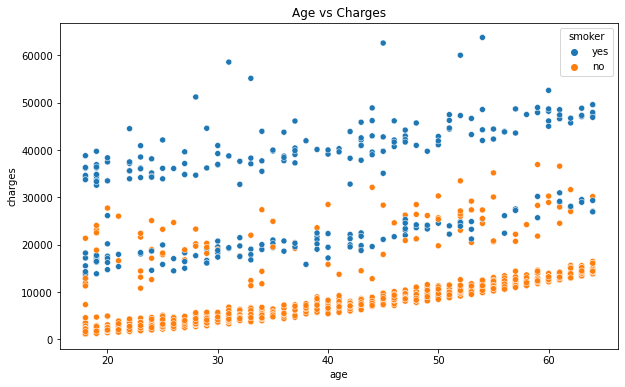

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges')
plt.show()


### BMI vs Charges


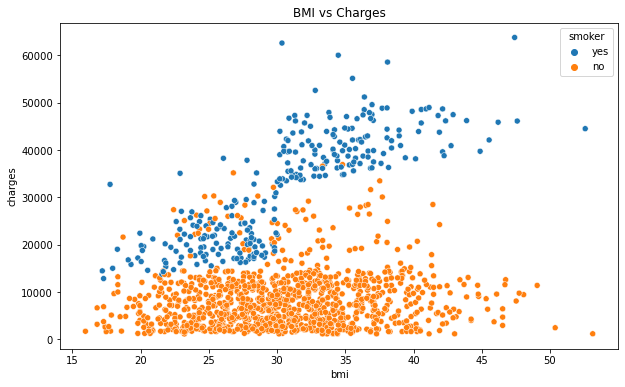

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges')
plt.show()


### Charges Distribution by Smoker


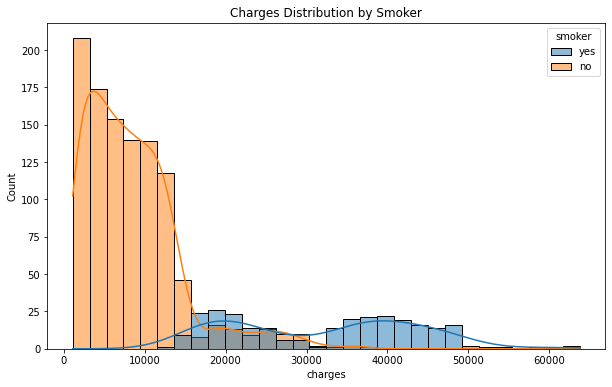

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance_data, x='charges', hue='smoker', kde=True)
plt.title('Charges Distribution by Smoker')
plt.show()


### Correlation Matrix


/tmp/ipykernel_53/4259778434.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm')


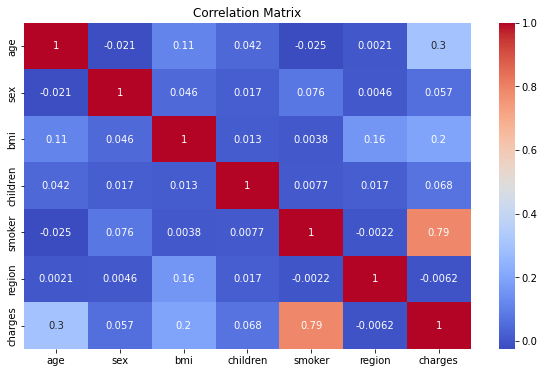

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(insurance_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
